### Radix-2 DIT fast fourier transform

In [15]:
import numpy as np
import cmath as m
import matplotlib
import matplotlib.pyplot as plt

#### Pseudocode 
```X0,...,N−1 ← ditfft2(x, N, s):             DFT of (x0, xs, x2s, ..., x(N-1)s):
    if N = 1 then
        X0 ← x0                                      trivial size-1 DFT base case
    else
        X0,...,N/2−1 ← ditfft2(x, N/2, 2s)             DFT of (x0, x2s, x4s, ...)
        XN/2,...,N−1 ← ditfft2(x+s, N/2, 2s)           DFT of (xs, xs+2s, xs+4s, ...)
        for k = 0 to N/2−1                           combine DFTs of two halves into full DFT:
            t ← Xk
            Xk ← t + exp(−2πi k/N) Xk+N/2
            Xk+N/2 ← t − exp(−2πi k/N) Xk+N/2
        endfor
    endif
```

https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm

In [4]:
def ditfft2(x, n):
    if n == 1:
        return x
    else:
        x[int(n/2)-1:] = ditfft2(x[int(n/2)-1:], int(n/2))
        x[:int(n/2)-1] = ditfft2(x[:int(n/2)-1], int(n/2))
        for k in range(0, int(n/2)-1):
            t = x[k]
            x[k] = t + m.exp(-2*np.pi * k / n) * x[k+int(n/2)]
            x[k+int(n/2)] = t - m.exp(-2*np.pi * k / n) * x[k+int(n/2)]
        return x
            

In [27]:
def plot_samples(samples, transformed_samples):
    fig = plt.figure(figsize=(8,8))
    colors = ['red', 'blue']
    plt.scatter(samples.real, samples.imag)
    fig = plt.figure(figsize=(8,8))
    plt.scatter(transformed_samples.real, transformed_samples.imag)


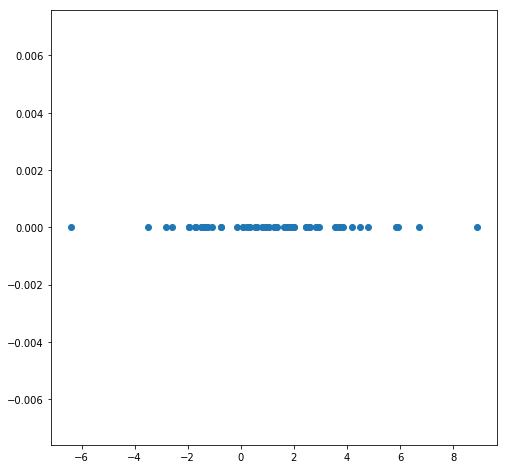

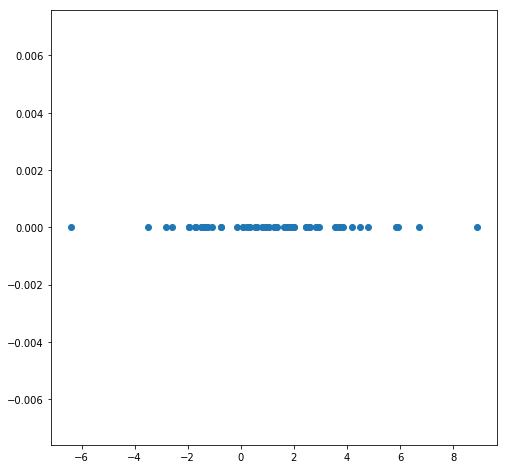

In [28]:
num_samples = 64
num_seconds = 1.0
sample_rate = num_samples/num_seconds
frequency = sample_rate/num_samples

freqs = [2, 5, 11, 17, 29]
samples = []

for i in range(0, num_samples):
    n = complex(0.0, 0.0)
    for j in range(0, len(freqs)):
        n += np.sin(2*np.pi*freqs[j]*i/num_samples)
    samples.append(n)
    
transformed_samples = ditfft2(samples, len(samples))
plot_samples(np.asarray(samples), np.asarray(transformed_samples))